In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data() #데이터 불러오기

x_train=x_train.reshape(-1, 28, 28, 1) #텐서로 변환(높이:28, 너비:28, 채널:1)
x_test=x_test.reshape(-1, 28, 28, 1)#reshape()의 '-1'이 의미하는 바는, 변경된 배열의 '-1' 위치의 차원은 "원래 배열의 길이와 남은 차원으로 부터 추정"이 된다는 뜻입니다

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0 #정규화
x_test = x_test.astype(np.float32) / 255.0

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [ ]:
#전체적인 구성: Conv Layer->Conv Layer->Pool Layer->Dropout Layer->Flat Layer->Dense Layer->Dropout Layer->Dense Layer
cnn = Sequential()
#convolutiona층을 나타내는 부분
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),  #입력데이터를 받기위해 28,28,1의 input_shape을 받고, 필터의 크기는 3x3크기의 33개로 받는다
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2))) #max pooling을 사용하는데 2x2의 크기로 max pooling을 진행한다
cnn.add(Dropout(0.25))  #overfitting을 막기위한 dropout layer로 0.25씩 무작위로 끊어서 진행한다(네트웍의 일부를 생략하는 개념)

cnn.add(Flatten())  #3차원 텐서를 1차원 벡터로 변환한다

cnn.add(Dense(128, activation='relu'))  #인공신경망의 은닉층 개념(128개의 노드를 가지고 relu의 활성화 함수를 가지는 은닉층 개념)
cnn.add(Dropout(0.5)) #overfitting을 막기위한 dropout layer로 0.5씩 무작위로 끊어서 진행한다(네트웍의 일부를 생략하는 개념)
cnn.add(Dense(10, activation='softmax'))  #인공신경망의 출력층 개념(10개의 노드를 가진 분류를 위한 softmax의 활성화 함수를 가짐)

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 173s 366ms/step - loss: 0.5373 - accuracy: 0.8092 - val_loss: 0.3427 - val_accuracy: 0.8726
Epoch 2/30
469/469 [==============================] - 158s 336ms/step - loss: 0.3449 - accuracy: 0.8775 - val_loss: 0.2915 - val_accuracy: 0.8928
Epoch 3/30
469/469 [==============================] - 149s 318ms/step - loss: 0.2951 - accuracy: 0.8945 - val_loss: 0.2656 - val_accuracy: 0.9027
Epoch 4/30
469/469 [==============================] - 151s 322ms/step - loss: 0.2637 - accuracy: 0.9046 - val_loss: 0.2432 - val_accuracy: 0.9097
Epoch 5/30
469/469 [==============================] - 147s 314ms/step - loss: 0.2388 - accuracy: 0.9123 - val_loss: 0.2264 - val_accuracy: 0.9166
Epoch 6/30
469/469 [==============================] - 149s 319ms/step - loss: 0.2191 - accuracy: 0.9193 - val_loss: 0.2185 - val_accuracy: 0.9196
Epoch 7/30
469/469 [==============================] - 148s 316ms/step - loss: 0.2037 - accuracy: 0.9259 - val_loss: 0.2137 -

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2678 - accuracy: 0.9310


[0.26780810952186584, 0.9309999942779541]

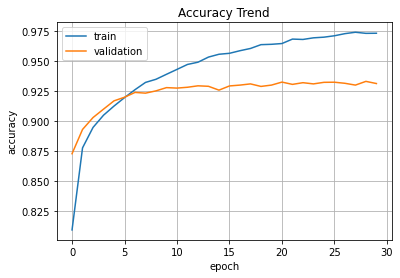

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

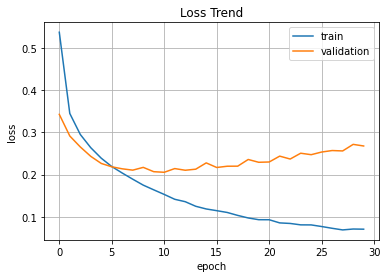

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()